## Partie 2 : Travail d'analyse

In [35]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy
from math import exp, sqrt, pi
from scipy.stats import chi2_contingency, pearsonr


In [36]:
complete = pd.read_csv('complete.csv')
complete = complete.drop(columns = complete.columns[0], axis=1)
complete.head()

,id_prod,price,categ,session_id,client_id,sex,birth,date,time
0,0_1421,19.99,0.0,s_168213,c_6389,f,1991,20/02/2022,17:04:37
1,0_1421,19.99,0.0,s_285450,c_6389,f,1991,20/10/2022,17:04:37
2,0_2131,8.99,0.0,s_102458,c_6389,f,1991,09/10/2021,21:47:06
3,0_1635,16.99,0.0,s_26841,c_6389,f,1991,28/04/2021,06:08:38
4,0_166,1.83,0.0,s_62585,c_6389,f,1991,15/07/2021,10:35:31


In [37]:
# Nous ajoutons une colonne 'age' pour la suite de nos analyses

complete['age'] = complete['birth'].apply(lambda x: (datetime.datetime.now().year - x))
complete.head()

,id_prod,price,categ,session_id,client_id,sex,birth,date,time,age
0,0_1421,19.99,0.0,s_168213,c_6389,f,1991,20/02/2022,17:04:37,32
1,0_1421,19.99,0.0,s_285450,c_6389,f,1991,20/10/2022,17:04:37,32
2,0_2131,8.99,0.0,s_102458,c_6389,f,1991,09/10/2021,21:47:06,32
3,0_1635,16.99,0.0,s_26841,c_6389,f,1991,28/04/2021,06:08:38,32
4,0_166,1.83,0.0,s_62585,c_6389,f,1991,15/07/2021,10:35:31,32


**Réponse aux demandes d'analyses d'Antoine et Julie**

In [38]:
# Nous allons étudier l'évolution du chiffre d'affaires dans le temps

info_CA = complete[['price', 'date']]
info_CA.loc[:, 'n_date'] = pd.to_datetime(info_CA['date'])
info_CA = info_CA.drop(['date'], axis=1)
info_CA = info_CA.sort_values(by='n_date', ascending=True)
info_CA.loc[:, 'year'] = info_CA['n_date'].dt.year
info_CA.loc[:, 'month'] = info_CA['n_date'].dt.month
info_CA.loc[:, 'day'] = info_CA['n_date'].dt.day
info_CA.head()

,price,n_date,year,month,day
292839,10.70,2021-01-03,2021,1,3
534633,15.63,2021-01-03,2021,1,3
195380,24.67,2021-01-03,2021,1,3
500140,10.86,2021-01-03,2021,1,3
303013,8.99,2021-01-03,2021,1,3


In [39]:
# Nous additions les prix par mois pour ensuite grouper ces chiffres par an

CA_mois = info_CA.groupby([(info_CA.year), (info_CA.month)]).sum()
CA_mois = CA_mois.drop(['day', 'year', 'month'], axis=1)

CA_mois.head(36)

price
year month           
2021 1      163003.22
     2      154934.02
     3      446749.44
     4      436632.78
     5      453890.54
     6      444736.34
     7      448287.03
     8      455643.29
     9      467227.23
     10     353807.87
     11     467694.96
     12     478219.84
2022 1      521048.06
     2      512150.04
     3      510718.30
     4      498000.07
     5      523778.68
     6      503168.44
     7      520424.71
     8      507060.93
     9      494444.12
     10     521790.91
     11     492342.24
     12     503755.31
2023 1      347800.10
     2      298638.08
     3       32956.38
     4       31782.99
     5       32584.27
     6       29375.54
     7       33343.93
     8       34781.95
     9       34499.94
     10      30256.33
     11      33373.06
     12      34827.74

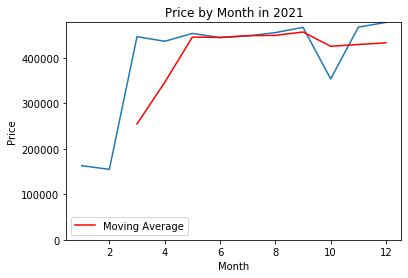

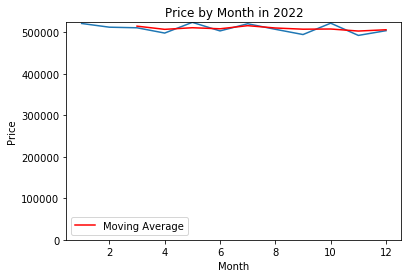

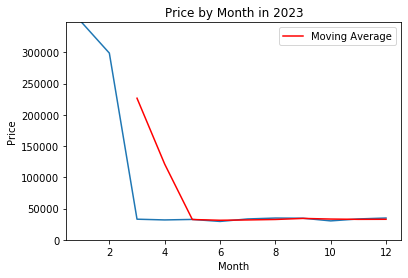

In [40]:
# Nous analysons l'évolution du chiffre d'affaires par année
# Ainsi que la moyenne mobile (sur 3 mois)

df = CA_mois

df_2021 = df.loc[2021]
df_2021['Moving Average'] = df_2021['price'].rolling(3).mean()

plt.plot(df_2021.index, df_2021['price'])
plt.plot(df_2021.index, df_2021['Moving Average'], label='Moving Average', color='red')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price by Month in 2021')
plt.legend()
plt.ylim(0, max(df_2021['price']))
plt.show()

df_2022 = df.loc[2022]
df_2022['Moving Average'] = df_2022['price'].rolling(3).mean()

plt.plot(df_2022.index, df_2022['price'])
plt.plot(df_2022.index, df_2022['Moving Average'], label='Moving Average', color='red')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price by Month in 2022')
plt.legend()
plt.ylim(0, max(df_2022['price']))
plt.show()

df_2023 = df.loc[2023]
df_2023['Moving Average'] = df_2023['price'].rolling(3).mean()

plt.plot(df_2023.index, df_2023['price'])
plt.plot(df_2023.index, df_2023['Moving Average'], label='Moving Average', color='red')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price by Month in 2023')
plt.legend()
plt.ylim(0, max(df_2023['price']))
plt.show()

L'évolution du chiffre d'affaire pour l'entreprise Lapage est très positive entre le début de l'année 2021 
(de 160 000€ à 480 000€) et 2022, année pendant laquelle, ce chiffre d'affaire se stabilise autour
des 510 000€ par mois.  
Ce chiffre d'affaire marque ensuite une baisse significative pour l'année 2023 qui ne présage rien de bon pour l'entreprise si la tendance se confirme (de 510 000€/mois à 325 000€/mois, baisse de 36%).  
A noter, une baisse du CA lors du mois de novembre 2021. N'ayant pas plus de contexte sur cette baisse, on pourrait penser à un bug informatique de la plateforme.

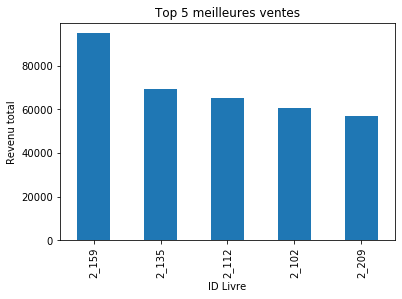

In [41]:
# Mettons en avant les 5 meilleures ventes de la librairie Lapage

sales_data = complete.groupby('id_prod')['price'].sum()

best_selling = sales_data.sort_values(ascending=False)
top_5_best_selling = best_selling.head()
top_5_best_selling.plot(kind='bar')

plt.title('Top 5 meilleures ventes')
plt.xlabel('ID Livre')
plt.ylabel('Revenu total')

plt.show()

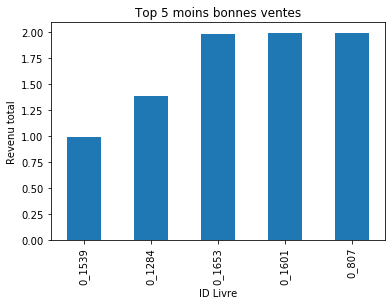

In [42]:
# Mettons en avant les 5 pires ventes de la librairie Lapage

worst_selling = sales_data.sort_values(ascending=True)
top_5_worst_selling = worst_selling.head()
top_5_worst_selling.plot(kind='bar')

plt.title('Top 5 moins bonnes ventes')
plt.xlabel('ID Livre')
plt.ylabel('Revenu total')

plt.show()

Nous pouvons proposer à l'entreprise de mettre en avant leurs best-sellers afin de maximiser leur CA.  
Il ne serait pas pertinent de retirer entièrement de son site internet les livres les moins vendus
étant donné qu'il s'agit d'une "bibliothèque" en ligne et qu'il faut pouvoir satisfaire le maximum de clients possibles.  
Mais il serait pertinent d'avoir de plus faible stock de ces livres moins populaires et de grossir le stock des plus populaires afin de mieux répondre à la demande.

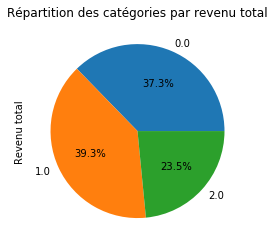

In [43]:
# Nous regardons ici la répartition par catégorie en fonction du revenu total généré

category_data = complete.groupby('categ')['price'].sum()
category_data.plot(kind='pie',autopct='%1.1f%%')
plt.title('Répartition des catégories par revenu total')

plt.ylabel('Revenu total')
plt.show()

Text(0, 0.5, 'Revenu total')

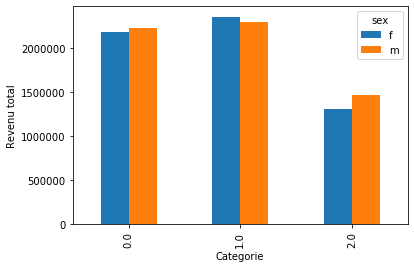

In [44]:
# Nous regardons ici la répartition des ventes totales par sexe et catégorie

pivot_table = pd.pivot_table(complete, values='price', index=['categ'], columns=['sex'], aggfunc=np.sum)

pivot_table.plot(kind='bar')
plt.xlabel("Categorie")
plt.ylabel("Revenu total")

La catégorie 2.0 est la catégorie qui a ramené le moins de revenu. Il serait intéressant que cette catégorie soit mise en avant afin qu'elle génère autant de revenus que les deux autres catégories et donc qu'elle booste le CA global de l'entreprise.  
Nous ne remarquons pas de disparité particulière entre le CA généré par les achats de livres faits par femmes ou des hommes.

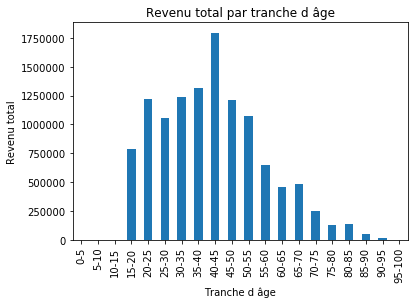

In [45]:
# Nous allons regarder la répartition du revenu total par tranche d'âge 
# présenter l'information avec une pyramide des ages par sexe

complete['age_group'] = pd.cut(complete['age'], bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100], labels = ['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70','70-75','75-80','80-85','85-90','90-95','95-100'])
age_group_sales = complete.groupby('age_group')['price'].sum()
age_group_sales.plot(kind='bar')
plt.title('Revenu total par tranche d âge')
plt.xlabel('Tranche d âge')
plt.ylabel('Revenu total')
plt.show()

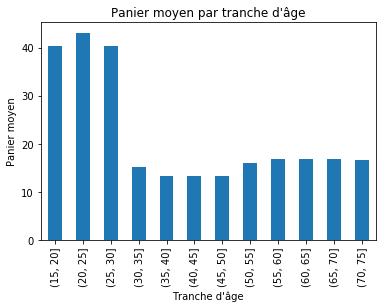

In [46]:
# Nous analysons les dépenses des clients
# Le panier moyen par tranche d'âge

df = complete

age_group = df.groupby(pd.cut(df["age"], range(15, 80, 5)))

average_basket = age_group["price"].mean()

average_basket.plot(kind="bar")
plt.xlabel("Tranche d'âge")
plt.ylabel("Panier moyen")
plt.title("Panier moyen par tranche d'âge")
plt.show()

Nous remarquons que les 40-45 ans sont les clients ayant générés le plus de chiffres d'affaires en ayant un des paniers moyens les plus faibles.  
On peut en conclure que ce sont nos clients les plus fidèles et les plus réguliers. 
L'accès aux technologies et à internet n'étant pas évident pour les personnes agées, ces catégories d'age seront difficiles à convaincre d'acheter.

In [47]:
# Nous allons regarder des indices de corrélations entre différents critères
# La fréquence d'achat et l'age des clients

df = complete

df['date'] = pd.to_datetime(df['date'])
df_grouped = df.groupby('client_id').agg({'id_prod': 'count', 'birth': 'first'})
df_grouped = df_grouped.rename(columns={'id_prod': 'frequency_of_purchase'})

corr = df_grouped.corr()
print(corr)

                       frequency_of_purchase     birth
frequency_of_purchase               1.000000 -0.006721
birth                              -0.006721  1.000000


L'indice de corrélation mesure la force et la direction de la relation entre deux variables. Dans ce cas, la corrélation entre fréquence d'achat et âge/année de naissance est très faible.  
Le coefficient de corrélation de -0,006721 entre la fréquence d'achat et l'année de naissance indique qu'il existe une très faible corrélation négative entre les deux variables. Cela signifie qu'à mesure que l'année de naissance augmente, la fréquence d'achat diminue légèrement mais pas de manière significative.

In [48]:
# L'age et le montant total des achats 

df = complete

total_purchases = df.groupby('client_id')['price'].sum()
merged_df = pd.merge(df, total_purchases, on='client_id', suffixes=('_indiv', '_total'))
corr_age_total = merged_df['age'].corr(merged_df['price_total'])

print("L'indice de corrélation entre l'age et le montant total des achats est : ", corr_age_total)

L'indice de corrélation entre l'age et le montant total des achats est :  -0.05003128012838218


Le résultat de -0,05 indique une très faible corrélation négative entre l'âge et le total des achats effectués.  
Cela signifie qu'à mesure que l'âge augmente, le montant total des achats diminue légèrement, mais la relation n'est pas très forte.  
  
Il est important de noter que la corrélation n'implique pas la causalité. Une corrélation négative ne signifie pas nécessairement qu'à mesure qu'une personne vieillit, elle dépense moins d'argent, ni qu'une variable fait changer l'autre. La corrélation indique simplement qu'il existe une relation entre les deux variables.

In [49]:
# L'age et la catégorie

df = complete

correlation = df['age'].corr(df['categ'])

print("L'indice de corrélation entre l'age et les catégories de livres est : ", correlation)

L'indice de corrélation entre l'age et les catégories de livres est :  -0.09924065023589002


L'indice de corrélation entre l'âge et les catégories de livres de -0,09 suggère une faible corrélation négative entre ces deux variables. Cela signifie qu'à mesure que l'âge augmente, le client a une légère tendance à acheter des livres d'une autre catégorie.  
Cependant, la corrélation est faible, ce qui indique que l'âge n'est pas un facteur significatif pour déterminer si un client achètera le livre d'autre catégorie.

## Tests Statistiques

In [50]:
df = complete

# Table de contingence pour le test du chi2
table = pd.crosstab(df['age'], df['categ'])
print(table)

# Test du chi2
chi2, pval, dof, expected = chi2_contingency(table)
print("Test du chi2:")
print("Chi2 =", chi2)
print("p-value =", pval)
print("Degrés de liberté =", dof)

# Coefficient de corrélation de Pearson
corr, pval = pearsonr(df['age'], df['price'])
print("Coefficient de corrélation de Pearson:")
print("Corrélation =", corr)
print("p-value =", pval)


categ   0.0   1.0   2.0
age                    
19     3418  5719  6012
20      909  1678  1784
21     1016  1723  1845
22      974  1550  1728
23     1114  1628  1671
..      ...   ...   ...
90      142   183     1
91      132   177     2
92       77    91     2
93       75   149     2
94       78   122     1

[76 rows x 3 columns]
Test du chi2:
Chi2 = 307533.0346578574
p-value = 0.0
Degrés de liberté = 150
Coefficient de corrélation de Pearson:
Corrélation = -0.20946478110175767
p-value = 0.0


Le résultat du test indique que la probabilité d'obtenir un chi2 aussi élevé ou plus élevé que celui observé dans l'échantillon par hasard est très faible (p-value = 0.0). On peut donc en conclure qu'il y a une relation significative entre l'âge et la catégorie de produits achetés.

Le coefficient de corrélation de Pearson mesure la relation linéaire entre deux variables. Dans ce cas, le résultat indique qu'il y a une corrélation négative modérée entre les variables étudiées, avec une valeur de corrélation de -0,209. Cela signifie que lorsque l'âge augmente, la fréquence d'achat des différentes catégories de produits diminue légèrement.

La p-value de 0.0 indique que cette corrélation est statistiquement significative, c'est-à-dire qu'il y a une forte probabilité que cette corrélation ne soit pas due au hasard mais reflète une véritable association entre les variables.

In [52]:
df = complete

# conversion de la colonne 'date' en datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# calcul de la colonne 'montant'
df['montant'] = df['price']

# regroupement par client_id pour calculer le montant total des achats
df_grouped = df.groupby('client_id')['montant'].sum().reset_index()

# fusion du dataframe original et du dataframe groupé pour avoir l'âge de chaque client
df_merged = pd.merge(df, df_grouped, on='client_id', suffixes=('', '_total'))

# test de chi2 pour l'âge et le montant total des achats
observed = pd.crosstab(pd.cut(df_merged['age'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), pd.cut(df_merged['montant_total'], bins=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]))
chi2, p, dof, expected = scipy.stats.chi2_contingency(observed)

# coefficient de corrélation de Pearson entre l'âge et le montant total des achats
corr, pval = scipy.stats.pearsonr(df_merged['age'], df_merged['montant_total'])

print(observed)
print('Test du chi2:')
print('Chi2 =', chi2)
print('p-value =', p)
print('Degrés de liberté =', dof)

print('Coefficient de corrélation de Pearson:')
print('Corrélation =', corr)
print('p-value =', pval)


montant_total  (0, 50]  (50, 100]  (100, 150]  (150, 200]  (200, 250]  \
age                                                                     
(15, 20]            13         42          27          83         108   
(20, 25]            16         53          51          71          82   
(25, 30]             5          7          90         122         127   
(30, 35]             7          9          92         113         180   
(35, 40]             0         47          96         158         209   
(40, 45]             0         17          63         163         249   
(45, 50]            10         34          47         156         387   
(50, 55]            16         97         153         297         450   
(55, 60]            10         85         147         281         308   
(60, 65]            18         49         118         234         195   
(65, 70]             8         53         128         167         187   
(70, 75]             4         37          94      

Le test du Chi2 a une p-value de 0.198, ce qui est supérieur à un seuil de significativité de 0.05. Cela indique que nous ne pouvons pas rejeter l'hypothèse nulle selon laquelle il n'y a pas de relation significative entre l'âge des clients et le montant total des achats. En d'autres termes, il n'y a pas suffisamment de preuves pour dire que l'âge des clients est lié au montant total de leurs achats.

Le coefficient de corrélation de Pearson mesure la force de la relation linéaire entre deux variables. Dans ce cas, la corrélation entre l'âge des clients et le montant total de leurs achats est de -0.04, ce qui indique une faible corrélation négative. Cela signifie que plus l'âge des clients augmente, moins ils ont tendance à dépenser. La p-value de 0.0002 suggère que cette corrélation est statistiquement significative, ce qui signifie que nous pouvons rejeter l'hypothèse nulle selon laquelle il n'y a pas de corrélation entre l'âge et le montant total des achats.

In [53]:
df = complete

# créer une nouvelle colonne pour le montant total des achats
df['montant_total'] = df['price']

# grouper les données par client_id pour obtenir le montant total des achats par client
df_grouped = df.groupby('client_id').agg({'montant_total': 'sum', 'age': 'first'})

# test de chi2 pour l'âge et le panier moyen des clients
observed = pd.crosstab(pd.cut(df_grouped['age'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), pd.cut(df_grouped['montant_total']/df_grouped.index.nunique(), bins=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]))
chi2, p, dof, expected = scipy.stats.chi2_contingency(observed)

# coefficient de corrélation de Pearson entre l'âge et le panier moyen des clients
corr, pval = scipy.stats.pearsonr(df_grouped['age'], df_grouped['montant_total']/df_grouped.index.nunique())

# afficher les résultats
print(observed)

print(f"Test du chi2:\nChi2 = {chi2}\np-value = {p}\nDegrés de liberté = {dof}\n\nCoefficient de corrélation de Pearson:\nCorrélation = {corr}\np-value = {pval}")


montant_total  (0, 50]
age                   
(15, 20]           582
(20, 25]           702
(25, 30]           797
(30, 35]           834
(35, 40]           811
(40, 45]           961
(45, 50]           805
(50, 55]           787
(55, 60]           663
(60, 65]           493
(65, 70]           516
(70, 75]           280
(75, 80]           156
(80, 85]           138
(85, 90]            58
(90, 95]            17
Test du chi2:
Chi2 = 0.0
p-value = 1.0
Degrés de liberté = 0

Coefficient de corrélation de Pearson:
Corrélation = -0.03990017789499486
p-value = 0.0002146446893419962


Le test de Chi2 pour l'âge et le panier moyen des clients indique que ces deux variables ne sont pas liées, car la p-value est très élevée (1.0), ce qui signifie que la distribution des fréquences observées est très proche de la distribution attendue (si les variables étaient indépendantes).

Le coefficient de corrélation de Pearson entre l'âge et le panier moyen des clients indique une faible corrélation négative entre ces deux variables, car le coefficient est proche de zéro (-0.04). Cela signifie qu'il y a une légère tendance à ce que les clients plus âgés aient des paniers moyens légèrement plus bas, mais que cette relation est très faible. La p-value est inférieure à 0.05, ce qui suggère que cette corrélation est statistiquement significative, mais la force de la corrélation est faible.

## Conclusion 

L'objectif pour Lapage serait de redresser le chiffre d'affaires pour l'année 2023 afin de retrouver les chiffres de 2022.
Pour se faire, il existe plusieurs pistes à explorer : 
- fidéliser les plus jeunes (15-30 ans) pour qu'ils achètent toujours autant mais plus souvent dans l'année
- augmenter le panier moyen des acheteurs les plus récurents (40-45 ans) 
- promouvoir les best-sellers
- tenter de séduire une clientèle plus agée 